In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [2]:
images_path = '/kaggle/input/flickr8k/Images/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [3]:
images[:5]

['/kaggle/input/flickr8k/Images/3226254560_2f8ac147ea.jpg',
 '/kaggle/input/flickr8k/Images/214543992_ce6c0d9f9b.jpg',
 '/kaggle/input/flickr8k/Images/2366643786_9c9a830db8.jpg',
 '/kaggle/input/flickr8k/Images/3368819708_0bfa0808f8.jpg',
 '/kaggle/input/flickr8k/Images/2190227737_6e0bde2623.jpg']

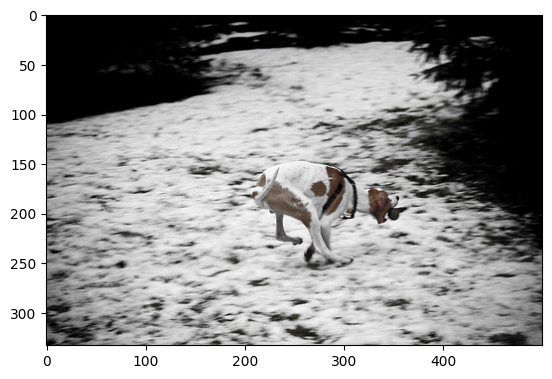

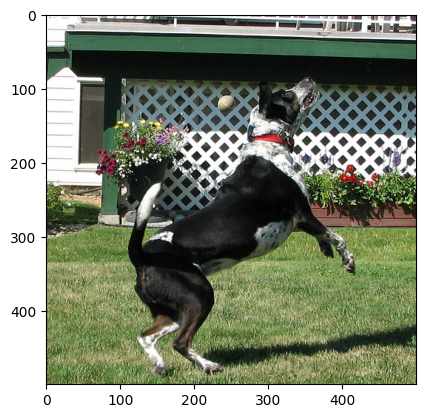

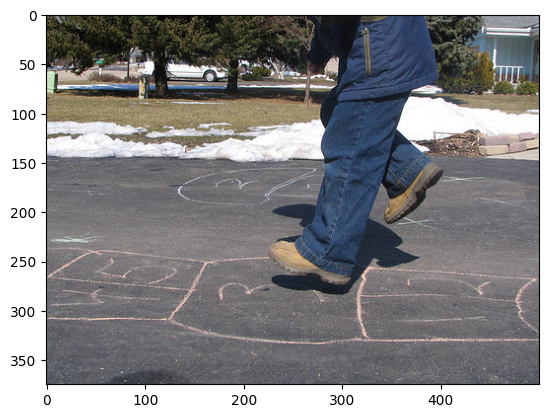

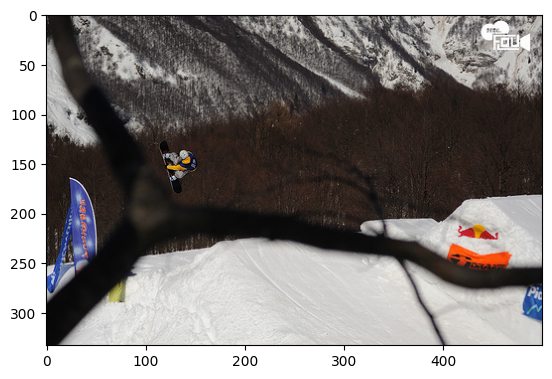

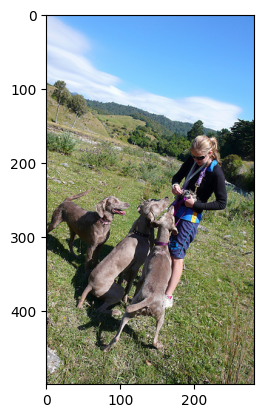

In [4]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [5]:
from keras.applications import ResNet50
incept_model = ResNet50(include_top=True)

2024-04-06 08:23:02.619095: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 08:23:02.619231: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 08:23:02.764445: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
incept_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [7]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input, outputs = last)
modele.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [8]:
image_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
    
    img_name = i.split('/')[-1]
    
    image_features[img_name] = pred
    
    count +=1
    if count >1499:
        break
    elif count%50 == 0:
        print(count)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


I0000 00:00:1712391806.415065      94 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

In [9]:
caption_path = '/kaggle/input/flickr8k/captions.txt'

In [10]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')
if captions:
    captions.pop(0)

In [11]:
captions

['1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg,A girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted rainbow with her hands in a 

In [12]:
captions[0].split(',')[0]

'1000268201_693b08cb0e.jpg'

In [13]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split(',')[0]
        caption = i.split(',')[1]
        if img_name in image_features:
            if img_name not in captions_dict:
                captions_dict[img_name] =  [caption]
            else:
                captions_dict[img_name].append(caption)
    except:
        pass

In [14]:
captions_dict

{'1002674143_1b742ab4b8.jpg': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'There is a girl with pigtails sitting in front of a rainbow painting .',
  'Young girl with pigtails painting outside in the grass .'],
 '102351840_323e3de834.jpg': ['A man drilling a hole in the ice .',
  'A man is drilling through the frozen ice of a pond .',
  'A person in the snow drilling a hole in the ice .',
  'A person standing on a frozen lake .',
  'Two men are ice fishing .'],
 '1024138940_f1fefbdce1.jpg': ['Two different breeds of brown and white dogs play on the beach .',
  'Two dogs are making a turn on a soft sand beach .',
  'Two dogs playing in the sand at the beach .',
  'Two dogs playing together on a beach .',
  'Two large tan dogs play along a sandy beach .'],
 '10320

In [15]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' +modified+ ' endofseq'
    return modified

In [16]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [17]:
captions_dict

{'1002674143_1b742ab4b8.jpg': ['startofseq a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl . endofseq',
  'startofseq a little girl is sitting in front of a large painted rainbow . endofseq',
  'startofseq a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it . endofseq',
  'startofseq there is a girl with pigtails sitting in front of a rainbow painting . endofseq',
  'startofseq young girl with pigtails painting outside in the grass . endofseq'],
 '102351840_323e3de834.jpg': ['startofseq a man drilling a hole in the ice . endofseq',
  'startofseq a man is drilling through the frozen ice of a pond . endofseq',
  'startofseq a person in the snow drilling a hole in the ice . endofseq',
  'startofseq a person standing on a frozen lake . endofseq',
  'startofseq two men are ice fishing . endofseq'],
 '1024138940_f1fefbdce1.jpg': ['startofseq two different breeds of brown and white dogs play on the beach 

In [18]:
count_words = {}
count = 1
for k, vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:
                count_words[word] = count
                count +=1

In [19]:
len(count_words)

4031

In [20]:
count_words

{'startofseq': 1,
 'a': 2,
 'little': 3,
 'girl': 4,
 'covered': 5,
 'in': 6,
 'paint': 7,
 'sits': 8,
 'front': 9,
 'of': 10,
 'painted': 11,
 'rainbow': 12,
 'with': 13,
 'her': 14,
 'hands': 15,
 'bowl': 16,
 '.': 17,
 'endofseq': 18,
 'is': 19,
 'sitting': 20,
 'large': 21,
 'small': 22,
 'the': 23,
 'grass': 24,
 'plays': 25,
 'fingerpaints': 26,
 'white': 27,
 'canvas': 28,
 'on': 29,
 'it': 30,
 'there': 31,
 'pigtails': 32,
 'painting': 33,
 'young': 34,
 'outside': 35,
 'man': 36,
 'drilling': 37,
 'hole': 38,
 'ice': 39,
 'through': 40,
 'frozen': 41,
 'pond': 42,
 'person': 43,
 'snow': 44,
 'standing': 45,
 'lake': 46,
 'two': 47,
 'men': 48,
 'are': 49,
 'fishing': 50,
 'different': 51,
 'breeds': 52,
 'brown': 53,
 'and': 54,
 'dogs': 55,
 'play': 56,
 'beach': 57,
 'making': 58,
 'turn': 59,
 'soft': 60,
 'sand': 61,
 'playing': 62,
 'at': 63,
 'together': 64,
 'tan': 65,
 'along': 66,
 'sandy': 67,
 'tent': 68,
 'being': 69,
 'set': 70,
 'up': 71,
 'about': 72,
 'to': 7

In [21]:
for k,vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():
            encoded.append(count_words[word])
        captions_dict[k][vv.index(v)] = encoded

In [22]:
captions_dict

{'1002674143_1b742ab4b8.jpg': [[1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   6,
   9,
   10,
   2,
   11,
   12,
   13,
   14,
   15,
   6,
   2,
   16,
   17,
   18],
  [1, 2, 3, 4, 19, 20, 6, 9, 10, 2, 21, 11, 12, 17, 18],
  [1,
   2,
   22,
   4,
   6,
   23,
   24,
   25,
   13,
   26,
   6,
   9,
   10,
   2,
   27,
   28,
   13,
   2,
   12,
   29,
   30,
   17,
   18],
  [1, 31, 19, 2, 4, 13, 32, 20, 6, 9, 10, 2, 12, 33, 17, 18],
  [1, 34, 4, 13, 32, 33, 35, 6, 23, 24, 17, 18]],
 '102351840_323e3de834.jpg': [[1, 2, 36, 37, 2, 38, 6, 23, 39, 17, 18],
  [1, 2, 36, 19, 37, 40, 23, 41, 39, 10, 2, 42, 17, 18],
  [1, 2, 43, 6, 23, 44, 37, 2, 38, 6, 23, 39, 17, 18],
  [1, 2, 43, 45, 29, 2, 41, 46, 17, 18],
  [1, 47, 48, 49, 39, 50, 17, 18]],
 '1024138940_f1fefbdce1.jpg': [[1,
   47,
   51,
   52,
   10,
   53,
   54,
   27,
   55,
   56,
   29,
   23,
   57,
   17,
   18],
  [1, 47, 55, 49, 58, 2, 59, 29, 2, 60, 61, 57, 17, 18],
  [1, 47, 55, 62, 6, 23, 61, 63, 23, 57, 17, 18],
  [1

In [23]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [24]:
MAX_LEN = 0
for k, vv in captions_dict.items(): 
    for v in vv: 
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 6, 9, 10, 2, 11, 12, 13, 14, 15, 6, 2, 16, 17, 18]
[1, 2, 22, 4, 6, 23, 24, 25, 13, 26, 6, 9, 10, 2, 27, 28, 13, 2, 12, 29, 30, 17, 18]
[1, 2, 176, 186, 6, 2, 77, 187, 54, 77, 188, 189, 2, 53, 190, 117, 2, 41, 46, 54, 191, 192, 17, 18]
[1, 23, 127, 6, 23, 77, 118, 19, 699, 2, 695, 696, 460, 2, 124, 261, 23, 127, 6, 23, 243, 376, 700, 73, 615, 147, 89, 17, 18]
[1, 2, 43, 6, 2, 94, 187, 1555, 2, 260, 454, 23, 142, 350, 2, 122, 54, 27, 201, 73, 1943, 344, 2, 53, 54, 27, 201, 207, 29, 17, 18]
[1, 2, 176, 13, 2, 2310, 186, 6, 1152, 120, 54, 2, 122, 541, 97, 20, 29, 23, 512, 10, 2, 36, 13, 2311, 120, 54, 2, 27, 118, 29, 2, 1559, 17, 18]


In [25]:
MAX_LEN

34

In [26]:
VOCAB_SIZE = len(count_words)
def generator(photo, caption):
    X = []
    y_in = []
    y_out = []
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])
                in_seq= [v[:i]]
                out_seq = v[i]
                in_seq= pad_sequences (in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0] 
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE+1)[0]
                y_in.append(in_seq)
                y_out.append(out_seq)
    return X, y_in, y_out

In [27]:
X, y_in, y_out = generator(image_features, captions_dict)

In [28]:
len(X), len(y_in), len(y_out)

(92038, 92038, 92038)

In [29]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [30]:
X.shape, y_in.shape, y_out.shape

((92038, 2048), (92038, 34), (92038, 4032))

In [31]:
from keras.utils import to_categorical
from keras.utils import plot_model 
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout 
from keras.layers import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten, Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector, Concatenate
from keras.models import Sequential, Model

In [41]:
from keras.layers import Concatenate, LSTM, Dense, Activation, RepeatVector, TimeDistributed
from keras.models import Model
from keras.layers import Input
embedding_size = 128
# Define input for image model
image_input = Input(shape=(2048,))

# Define input for language model
language_input = Input(shape=(MAX_LEN,))

# Build image model
image_model = Sequential()
image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(MAX_LEN))

# Build language model
language_model = Sequential()
language_model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=embedding_size))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

# Call image model on the image input
image_output = image_model(image_input)

# Call language model on the language input
language_output = language_model(language_input)

# Concatenate the outputs of image_model and language_model
conca = Concatenate()([image_output, language_output])

# Continue building your model...


x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(VOCAB_SIZE+1)(x)
out = Activation('softmax')(x)

# Define the complete model
model = Model(inputs=[image_model.input, language_model.input], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Print the model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_19      │ (None, 34)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_8        │ (None, 34, 128)   │    262,272 │ input_layer_18[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_9        │ (None, 34, 128)   │    943,104 │ input_layer_19[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 34, 256)   │          0 │ sequential_8[0][… │
│ (Concatenate)       │                   │            │ sequential_9[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 34, 128)   │    197,120 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ (None, 512)       │  1,312,768 │ lstm_7[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 4032)      │  2,068,416 │ lstm_8[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 4032)      │          0 │ dense_9[0][0]     │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,783,680 (18.25 MB)

 Trainable params: 4,783,680 (18.25 MB)

 Non-trainable params: 0 (0.00 B)

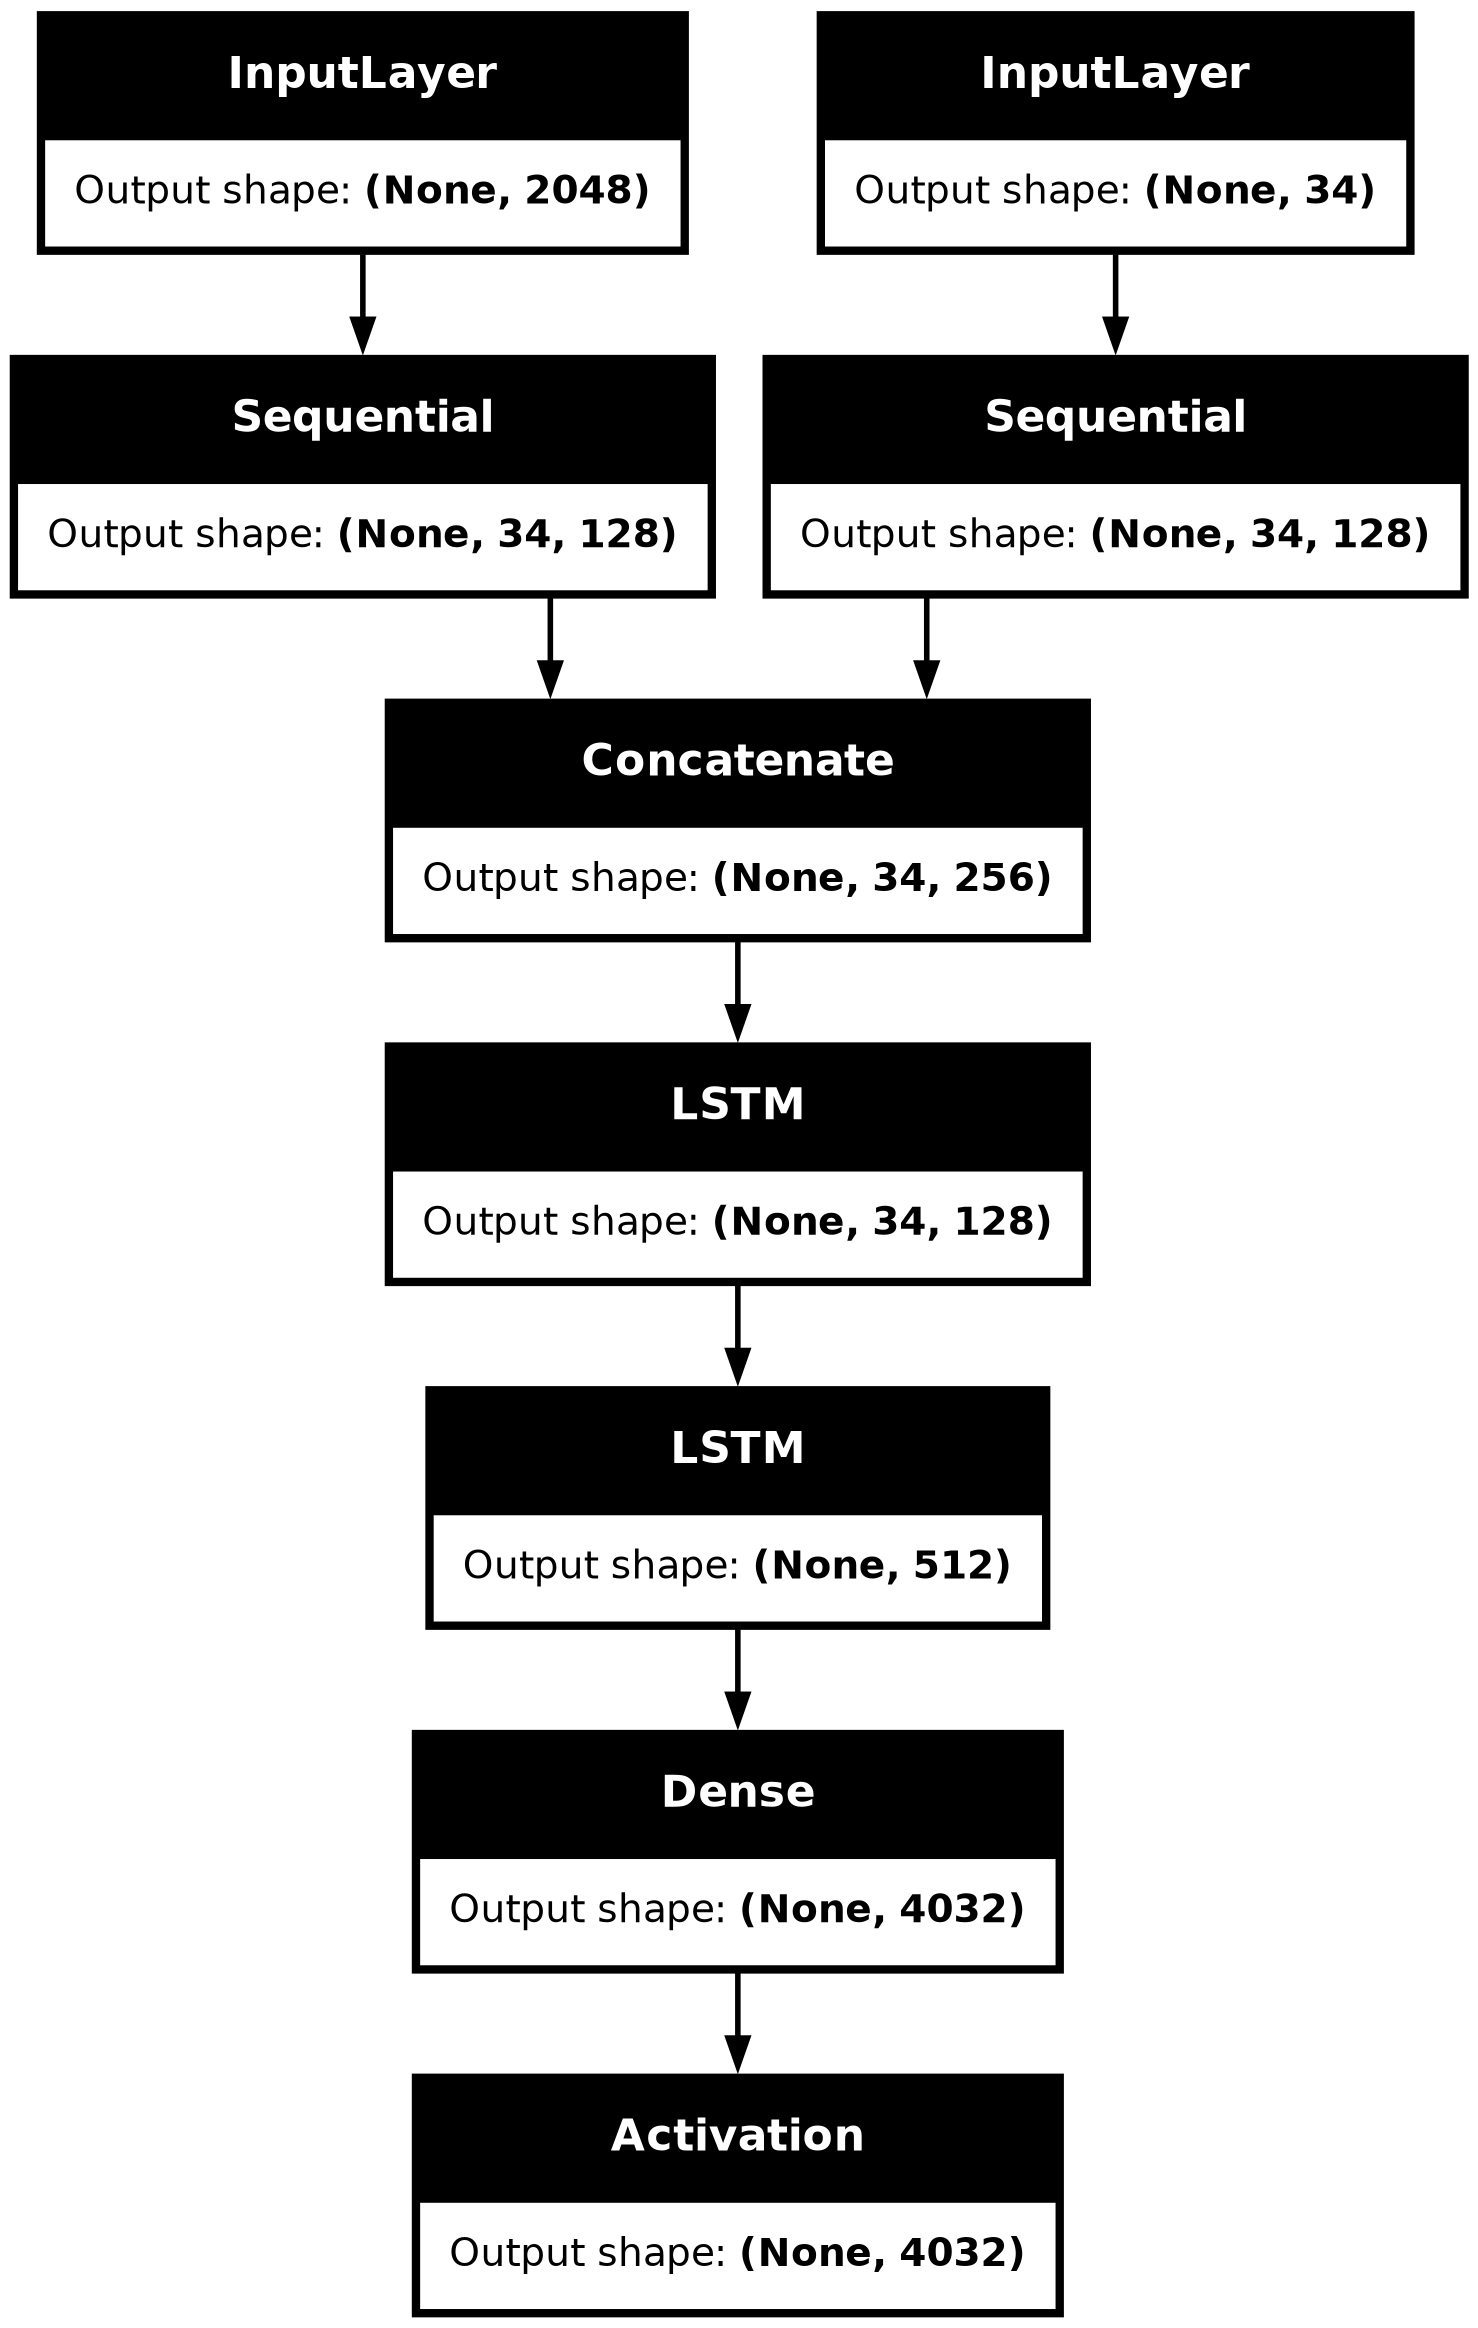

In [42]:
from keras.utils import plot_model
plot_model(model, show_shapes = True)

In [43]:
model.fit([X, y_in], y_out, batch_size=32, epochs = 60)

Epoch 1/60
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.1122 - loss: 5.4204
Epoch 2/60
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.1181 - loss: 5.2482
Epoch 3/60
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.1140 - loss: 5.2776
Epoch 4/60
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.1161 - loss: 5.2132
Epoch 5/60
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - accuracy: 0.1178 - loss: 5.1510
Epoch 6/60
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.1149 - loss: 5.1486
Epoch 7/60
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.1151 - loss: 5.1307
Epoch 8/60
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.1175 - loss: 5.1050
Epoch 9/60
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.1154 - loss: 5.0844
Epoch 10/60
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.1195 - loss: 5.0654
Epoch 11/60
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.1162 - loss: 5.0458
Epoch 12

In [44]:
inv_dict = {v:k for k,v in count_words.items()}

In [47]:
model.save('model_60_32.h5', overwrite = True)

ValueError: Unable to synchronously create dataset (name already exists)

In [111]:
model.save_weights('mine_model_weights60.weights.h5')

In [50]:
np.save('vocab_60_32.npy', count_words)

In [51]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (299,299))

    test_img = np.reshape(test_img, (1,299,299,3))
    
    return test_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━

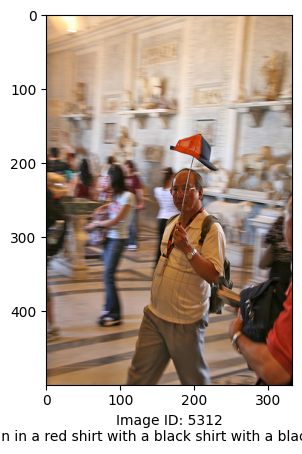

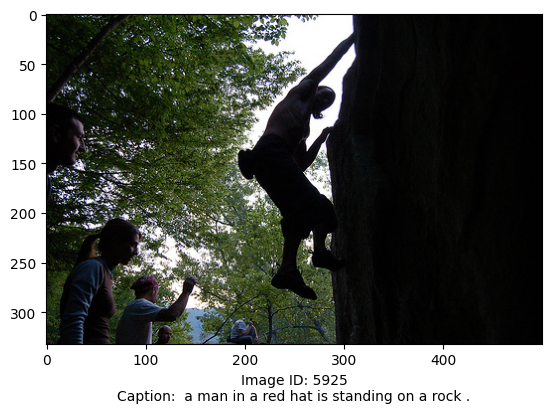

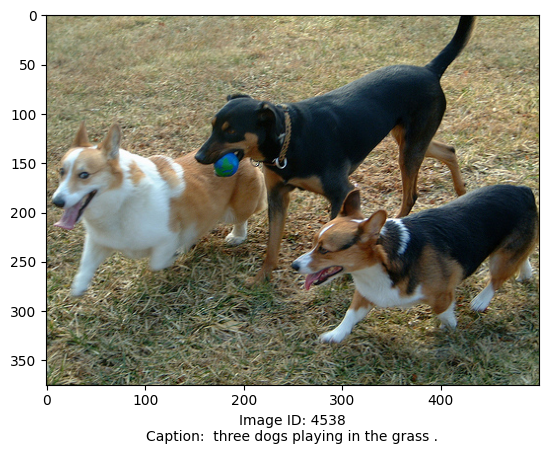

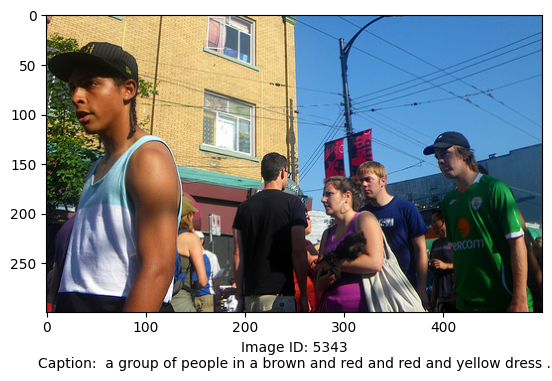

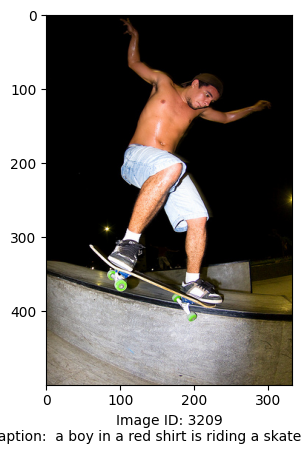

In [52]:
for i in range(5):
    no = np.random.randint(1500, 7000)
    test_feature = modele.predict(getImage(no)).reshape(1, 2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    text_inp = ['startofseq']
    count = 0
    caption = ''
    while count < 25:
        count += 1
        encoded = []
        for i in text_inp:
            encoded.append(count_words[i])
        encoded = [encoded]
        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)
        prediction = np.argmax(model.predict([test_feature, encoded]))
        sampled_word = inv_dict[prediction]
        if sampled_word == 'endofseq':
            break
        caption = caption + ' ' + sampled_word
        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(f"Image ID: {no}\nCaption: {caption}")

In [70]:
import zipfile

with zipfile.ZipFile("/kaggle/working/nltk_data/corpora/wordnet.zip", "r") as zip_ref:
    zip_ref.extractall("/kaggle/working/nltk_data/corpora")

In [75]:
import nltk
from nltk.translate.bleu_score import corpus_bleu
from nltk.stem import WordNetLemmatizer

# Set the NLTK data path to the specified directory
nltk.data.path = ['/kaggle/working/nltk_data/']

# Download the WordNet and punkt resources
nltk.download('wordnet')
nltk.download('punkt')

# Sample reference captions (replace with your reference captions)
reference_captions = [
    ['a', 'black', 'dog', 'circumvents', 'a', 'wooden', 'fence', 'in', 'a', 'snowy', 'yard'],
]

# Sample predicted caption (replace with your predicted captions)
predicted_caption = ['a', 'black', 'dog', 'and', 'a', 'dog', 'are', 'running', 'on', 'a', 'snowy', 'beach']

# Compute BLEU scores
bleu1 = corpus_bleu(reference_captions, [predicted_caption], weights=(1, 0, 0, 0))
bleu2 = corpus_bleu(reference_captions, [predicted_caption], weights=(0.5, 0.5, 0, 0))
bleu3 = corpus_bleu(reference_captions, [predicted_caption], weights=(0.33, 0.33, 0.33, 0))
# Computing BLEU-4 score requires the download of the required nltk data
bleu4 = corpus_bleu(reference_captions, [predicted_caption])

# Calculate METEOR score manually
wordnet_lemmatizer = WordNetLemmatizer()

def meteor_score(reference_captions, predicted_caption):
    precision = 0
    recall = 0
    num_matches = 0

    for predicted_word in predicted_caption:
        for reference in reference_captions:
            for reference_word in reference:
                if wordnet_lemmatizer.lemmatize(predicted_word) == wordnet_lemmatizer.lemmatize(reference_word):
                    num_matches += 1
                    break

    precision = num_matches / len(predicted_caption)
    recall = num_matches / sum(len(reference) for reference in reference_captions)

    if precision == 0 or recall == 0:
        meteor_score = 0
    else:
        meteor_score = precision * recall / (0.9 * precision + 0.1 * recall)

    return meteor_score

meteor_score_val = meteor_score(reference_captions, predicted_caption)

# Print the scores
print("BLEU-1: ", bleu1)
print("BLEU-2: ", bleu2)
print("BLEU-3: ", bleu3)
print("BLEU-4: ", bleu4)
print("METEOR: ", meteor_score_val)

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
BLEU-1:  0.08333333333333333
BLEU-2:  0.28867513459481287
BLEU-3:  0.44042320075255215
BLEU-4:  0.537284965911771
METEOR:  0.6306306306306306


In [101]:
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np

# Function to compute CIDEr score
def compute_cider(reference_captions, predicted_captions):
    def tokenize(sentence):
        return word_tokenize(sentence.lower())

    def compute_tf(tokens):
        return Counter(tokens)

    def compute_df(reference_captions):
        df = Counter()
        for caption in reference_captions:
            tokens = set(tokenize(caption))
            df.update(tokens)
        return df

    def compute_idf(df, num_references):
        idf = {}
        for token, freq in df.items():
            idf[token] = np.log((num_references + 1) / (freq + 1))  # Add 1 to avoid division by zero
        return idf

    def compute_tf_idf(tokens, idf):
        tf = compute_tf(tokens)
        tf_idf = {}
        for token, freq in tf.items():
            if token in idf:  # Check if token exists in IDF dictionary
                tf_idf[token] = freq * idf[token]
            else:
                tf_idf[token] = 0  # Set IDF to 0 if token not found
        return tf_idf


    num_references = len(reference_captions)
    df = compute_df(reference_captions)
    idf = compute_idf(df, num_references)

    max_len_tokens = max(len(tokenize(caption)) for caption in reference_captions + predicted_captions)

    cider_scores = []
    for predicted_caption in predicted_captions:
        predicted_tokens = tokenize(predicted_caption)
        predicted_tf_idf = compute_tf_idf(predicted_tokens, idf)
        predicted_tf_idf_padded = np.zeros(max_len_tokens)

        for i, token in enumerate(predicted_tokens):
            predicted_tf_idf_padded[i] = predicted_tf_idf[token]

        reference_tf_idf_arrays = []
        for reference_caption in reference_captions:
            reference_tokens = tokenize(reference_caption)
            reference_tf_idf = compute_tf_idf(reference_tokens, idf)
            reference_tf_idf_padded = np.zeros(max_len_tokens)

            for i, token in enumerate(reference_tokens):
                reference_tf_idf_padded[i] = reference_tf_idf[token]

            reference_tf_idf_arrays.append(reference_tf_idf_padded)

        similarities = []
        for ref_tf_idf in reference_tf_idf_arrays:
            dot_product = np.dot(predicted_tf_idf_padded, ref_tf_idf)
            norm_product = np.linalg.norm(predicted_tf_idf_padded) * np.linalg.norm(ref_tf_idf)
            similarity = dot_product / norm_product if norm_product != 0 else 0
            similarities.append(similarity)

        cider_score = np.mean(similarities)
        cider_scores.append(cider_score)

    return cider_scores

# Example usage:
reference_captions = [
    'a black dog circumvents a wooden fence in a snowy yard',
]
predicted_captions = ['a black dog and a dog are running on a snowy beach']

cider_scores = compute_cider(reference_captions, predicted_captions)
print("CIDEr scores:", cider_scores)


CIDEr scores: [0.0]


In [103]:
pip install pycocoevalcap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 15.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 25.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [104]:
from pycocoevalcap.cider.cider import Cider

# Example reference captions and predicted captions
reference_captions = {'image1': ['a black dog circumvents a wooden fence in a snowy yard']}
predicted_captions = {'image1': ['a black dog and a dog are running on a snowy beach']}

# Initialize the CIDEr scorer
cider_scorer = Cider()

# Compute the CIDEr score
cider_score, _ = cider_scorer.compute_score(reference_captions, predicted_captions)

print("CIDEr score:", cider_score)

CIDEr score: 0.0
